# **DLN: CONSTRUCTION SAFETY GEARS DETECTION USING YOLO**

Name: Nabila Tajrin Bristy


## **1. INSTALL ULTRALYTICS**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 14.8 MB/s eta 0:00:00


## **2. MOUNT GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **3. IMPORT LIBRARIES**

In [ ]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import logging
import torch
import yaml
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## **4. PROJECT SETUP**

In [ ]:
# Base directory path
base_dir = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project'

# List of folders to create
folders = [
    'dataset/train/images',
    'dataset/train/labels',
    'dataset/valid/images',
    'dataset/valid/labels',
    'dataset/test/images',
    'dataset/test/labels',
    'models',
    'weights',
    'results'
]

# Create the folders
for folder in folders:
    folder_path = os.path.join(base_dir, folder)
    os.makedirs(folder_path, exist_ok=True)
    print(f'Created: {folder_path}')

# Create data.yaml with specified content
data_yaml = {
    'train': f'{base_dir}/dataset/train/images',
    'val': f'{base_dir}/dataset/valid/images',
    'test': f'{base_dir}/dataset/test/images',
    'nc': 11,
    'names': [
        'Gloves', 'Hardhat', 'Mask', 'NO-Gloves', 'NO-Hardhat', 'NO-Mask',
        'NO-Safety Boot', 'NO-Safety Vest', 'Person', 'Safety Boot', 'Safety Vest'
    ],
    'roboflow': {
        'workspace': 'construction-ppe-dataset',
        'project': 'construction-safety-gears-vcbdq',
        'version': 1,
        'license': 'CC BY 4.0',
        'url': 'https://universe.roboflow.com/construction-ppe-dataset/construction-safety-gears-vcbdq/dataset/1'
    }
}

# Save data.yaml
yaml_file_path = os.path.join(base_dir, 'dataset', 'data.yaml')
with open(yaml_file_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)
print(f"YAML file created at: {yaml_file_path}")

Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/train/images
Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/train/labels
Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/valid/images
Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/valid/labels
Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images
Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/labels
Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/models
Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/weights
Created: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/results
YAML file created at: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/data.yaml


## **5. CHECK CONTENTS IN DIRECTORIES**

In [ ]:
import os

# Base directory path
base_dir = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project'

# Subdirectories to check
sub_dirs = ['train', 'valid', 'test']

# Loop through each subdirectory and check for files
for sub_dir in sub_dirs:
    dir_path = os.path.join(base_dir, 'dataset', sub_dir, 'images')
    if os.path.exists(dir_path):
        # Get all files, not just images
        all_files = os.listdir(dir_path)
        num_files = len(all_files)
        print(f"Total number of files in {sub_dir} directory: {num_files}")

        # If you still want to print image info:
        images = [f for f in all_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"Number of images found in {sub_dir} directory: {len(images)}")
        print("Sample images:", images[:5])
    else:
        print(f"{sub_dir.capitalize()} directory does NOT exist.")

Total number of files in train directory: 360
Number of images found in train directory: 360
Sample images: ['-2270-_png_jpg.rf.6ecd58fc5efd664c858245d96b027558.jpg', '005376_jpg.rf.2347a08018d7c279701b1061aeb20471.jpg', '005180_jpg.rf.ed7906fd8a21378bc7f9747fefa152ab.jpg', '006858_jpg.rf.7125192e31e8cd0ff6f663ca877e64e9.jpg', '005239_jpg.rf.4e9e555a97a60eb2b5886423e20ec528.jpg']
Total number of files in valid directory: 30
Number of images found in valid directory: 30
Sample images: ['89_jpeg.rf.1438756164e9f98a8cfa0ac2f52c0da6.jpg', '107_jpg.rf.cfb43b6d71a6e0cc6d68976dca7e4580.jpg', '127_jpeg.rf.208b275cde6e3f46dee0820851520a5a.jpg', 'image_167_jpg.rf.fd2fc439de3d7e4240a99d6ca1d3f583.jpg', '67_jpeg.rf.109a4668b917263f62c144deee869918.jpg']
Total number of files in test directory: 34
Number of images found in test directory: 34
Sample images: ['86_jpeg.rf.da63fafe7c8410aa4bbc70b0de752f3b.jpg', 'image_166_jpg.rf.84d5338fae0623bf85d27ea932da2285.jpg', '36_jpeg.rf.0ab9886db788986d43ab9a7

## **6. DEFINE MODEL PATH**

In [ ]:
model_path = f'{base_dir}/runs/train/construction-safety-gear/weights/'

## **7. CHECK MODEL PATH EXISTENCE**

In [ ]:
if not os.path.exists(model_path):
    print(f"Error: Model file does not exist at {model_path}. Please verify the correct path.")
else:
    print(f"Model path verified: {model_path}")

Model path verified: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/runs/train/construction-safety-gear/weights/


## **8. TRAINING THE MODEL**

In [ ]:
import logging
from pathlib import Path
from ultralytics import YOLO

# Setup logging configuration
log_file = Path(f"{base_dir}/train_logs.log")
logging.basicConfig(
    filename=log_file,
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger()

# Train YOLOv8 model with customized settings
def train_model():
    try:
        model = YOLO('yolov8n.pt')  # Load pre-trained YOLO model

        model.train(
            data=yaml_file_path,  # Path to data.yaml
            epochs=5,  # Number of training epochs
            imgsz=640,  # Image size
            batch=16,  # Batch size
            project=f'{base_dir}/runs/train',  # Project folder
            name='construction-safety-gear',
            optimizer='Adam',
            lr0=0.001,  # Initial learning rate
            lrf=0.01,  # Learning rate factor (adjust this for better training)
            workers=4
        )
        logger.info("Training completed successfully.")
    except Exception as e:
        logger.error(f"Training failed: {e}")

train_model()

100%|██████████| 6.25M/6.25M [00:00<00:00, 16.3MB/s]


Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/runs/train, name=construction-safety-gear, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, emb

train: Scanning /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/train/labels.cache... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/runs/train/construction-safety-gear/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/runs/train/construction-safety-gear
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.795      3.483       1.86         86        640: 100%|██████████| 23/23 [05:24<00:00, 14.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:29<00:00, 29.62s/it]

                   all         30        155    0.00134      0.177     0.0328     0.0157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.728      2.944        1.8         82        640: 100%|██████████| 23/23 [05:05<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.61s/it]

                   all         30        155      0.704     0.0906       0.12     0.0567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.671      2.621      1.771         83        640: 100%|██████████| 23/23 [05:03<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.25s/it]

                   all         30        155      0.867      0.108      0.283     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.649      2.434      1.764         98        640: 100%|██████████| 23/23 [04:56<00:00, 12.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.96s/it]

                   all         30        155      0.602      0.159      0.235     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.654      2.349      1.769         79        640: 100%|██████████| 23/23 [04:57<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.10s/it]

                   all         30        155      0.501      0.317      0.361      0.151



5 epochs completed in 0.446 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/runs/train/construction-safety-gear/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/runs/train/construction-safety-gear/weights/best.pt, 6.2MB

Validating /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/runs/train/construction-safety-gear/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.84s/it]


                   all         30        155      0.501      0.316      0.361      0.151
                Gloves         19         28     0.0834     0.0149     0.0568     0.0226
               Hardhat         19         25      0.662      0.314      0.553      0.177
                  Mask          4          4      0.537      0.306      0.542      0.278
             NO-Gloves          4          6          1          0      0.223     0.0577
            NO-Hardhat          3          3      0.189      0.667      0.382      0.154
               NO-Mask         12         13          1          0       0.14     0.0349
        NO-Safety Vest          8         10      0.128        0.1     0.0373     0.0144
                Person         26         32      0.433      0.834      0.728      0.359
           Safety Boot          9         18      0.549      0.611      0.636      0.243
           Safety Vest         13         16      0.425      0.312      0.314      0.167
Speed: 2.7ms preproce

## **9. FINE-TUNING THE MODEL**

In [ ]:
import os
from ultralytics import YOLO

# Base directory path
base_dir = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project'

# Path to the pre-trained YOLO model (e.g., yolov8n.pt)
pretrained_model_path = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/models/yolov8n.pt'

# Path to your dataset
yaml_file_path = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/data.yaml'

# Output directory for the fine-tuned model
output_dir = os.path.join(base_dir, 'runs', 'train', 'fine_tuned')

# Hyperparameters for fine-tuning (specified via CLI arguments, not in a 'hyp' dict)
lr0 = 0.01  # Initial learning rate
epochs = 2   # Number of epochs to train
batch_size = 1  # Batch size
imgsz = 640  # Image size

# Initialize the YOLOv8 model with the pre-trained weights
model = YOLO(pretrained_model_path)

# Train the model using previously declared paths for data and directories
results = model.train(
    data=yaml_file_path,           # Path to the data.yaml file
    epochs=epochs,                 # Number of epochs
    batch=batch_size,              # Batch size
    imgsz=imgsz,                   # Image size
    project=base_dir,              # Output project directory
    name="fine_tuned",             # Output directory name for this training session
    save=True,                     # Save weights after each epoch
    lr0=lr0                        # Initial learning rate
)

# Print accuracies after each epoch (from the results object)
print(f"Results for {epochs} epoch(s):")
# Access metrics using results_dict and box properties
metrics_dict = results.results_dict
# Access metrics directly (without indexing)
print(f"  - Training Accuracy (Precision): {metrics_dict['metrics/precision(B)']:.4f}")
print(f"  - Validation Accuracy (Recall): {metrics_dict['metrics/recall(B)']:.4f}")
print("-" * 30)

# Fine-tuning is complete, and model will be saved after training
print("Fine-tuning complete!")

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/models/yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/data.yaml, epochs=2, time=None, patience=100, batch=1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/My Drive/Colab Notebooks/dataset/yolo_project, name=fine_tuned5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=F

train: Scanning /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/train/labels.cache... 360 images, 0 backgrounds, 0 corrupt: 100%|██████████| 360/360 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/fine_tuned5/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/fine_tuned5
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G      1.936      3.901      2.068          8        640: 100%|██████████| 360/360 [05:16<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]

                   all         30        155      0.978     0.0545        0.1     0.0507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      1.852      3.533      1.998         12        640: 100%|██████████| 360/360 [05:09<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]

                   all         30        155      0.531      0.167      0.163     0.0764



2 epochs completed in 0.182 hours.
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/fine_tuned5/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/fine_tuned5/weights/best.pt, 6.2MB

Validating /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/fine_tuned5/weights/best.pt...
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.61it/s]


                   all         30        155      0.532      0.167      0.164     0.0766
                Gloves         19         28          0          0     0.0325     0.0143
               Hardhat         19         25       0.21       0.44      0.307      0.149
                  Mask          4          4          1          0      0.169     0.0499
             NO-Gloves          4          6          1          0    0.00689    0.00351
            NO-Hardhat          3          3          1          0     0.0149    0.00529
               NO-Mask         12         13          1          0     0.0446      0.009
        NO-Safety Vest          8         10          0          0    0.00491    0.00187
                Person         26         32      0.386      0.781      0.544       0.31
           Safety Boot          9         18      0.626      0.389      0.476      0.202
           Safety Vest         13         16     0.0975     0.0625     0.0374     0.0212
Speed: 3.6ms preproce

## **10. MODEL VALIDATION**

In [ ]:
import os
from ultralytics import YOLO

# Base directory path
base_dir = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project'

# Path to the trained YOLO model (e.g., fine-tuned model)
trained_model_path = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/fine_tuned5/weights/best.pt'

# Path to your dataset (data.yaml file)
yaml_file_path = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/data.yaml'

# Image size for validation
imgsz = 640  # Image size

# Batch size for validation
batch_size = 1

# Initialize the YOLOv8 model with the trained weights
model = YOLO(trained_model_path)

# Validate the model with the best weights
validation_results = model.val(
    data=yaml_file_path,   # Path to the data.yaml file
    imgsz=imgsz,           # Image size
    batch=batch_size       # Batch size
)

# Access the validation results and print relevant metrics
val_metrics_dict = validation_results.results_dict

# Print validation metrics
print(f"Validation Results:")
print(f"  - Validation Precision: {val_metrics_dict['metrics/precision(B)']:.4f}")
print(f"  - Validation Recall: {val_metrics_dict['metrics/recall(B)']:.4f}")

# Check the keys actually present:
print(f"Available keys in val_metrics_dict: {val_metrics_dict.keys()}")

# Attempt to access mAP using a different key
try:
    print(f"  - Validation mAP50: {val_metrics_dict['metrics/mAP50(B)']:.4f}")  # Try 'metrics/mAP50(B)'
    print(f"  - Validation mAP50-95: {val_metrics_dict['metrics/mAP50-95(B)']:.4f}")  # Try 'metrics/mAP50-95(B)'
except KeyError:
    print("mAP values not found in results dictionary. Check if they are being calculated.")

# Validation complete
print("Validation complete!")

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:08<00:00,  3.36it/s]


                   all         30        155      0.532      0.167      0.164     0.0766
                Gloves         19         28          0          0     0.0325     0.0143
               Hardhat         19         25       0.21       0.44      0.307      0.149
                  Mask          4          4          1          0      0.169     0.0499
             NO-Gloves          4          6          1          0    0.00689    0.00351
            NO-Hardhat          3          3          1          0     0.0149    0.00529
               NO-Mask         12         13          1          0     0.0446      0.009
        NO-Safety Vest          8         10          0          0    0.00491    0.00187
                Person         26         32      0.386      0.781      0.544       0.31
           Safety Boot          9         18      0.626      0.389      0.476      0.202
           Safety Vest         13         16     0.0975     0.0625     0.0374     0.0212
Speed: 3.3ms preproce

## **11. MODEL EVALUATION AND PREDICTION**

Test images found: 33
Model loaded from: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/runs/train/construction-safety-gear3/weights/best.pt
Processing image 1/33: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/86_jpeg.rf.da63fafe7c8410aa4bbc70b0de752f3b.jpg

image 1/1 /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/86_jpeg.rf.da63fafe7c8410aa4bbc70b0de752f3b.jpg: 640x640 1 Hardhat, 1 Person, 203.6ms
Speed: 3.2ms preprocess, 203.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Processing image 2/33: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/image_166_jpg.rf.84d5338fae0623bf85d27ea932da2285.jpg

image 1/1 /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/image_166_jpg.rf.84d5338fae0623bf85d27ea932da2285.jpg: 640x640 2 Glovess, 1 Mask, 1 Person, 1 Safety Boot, 1 Safety Vest, 198.6ms
Speed: 2.4ms preprocess, 198.6ms infe

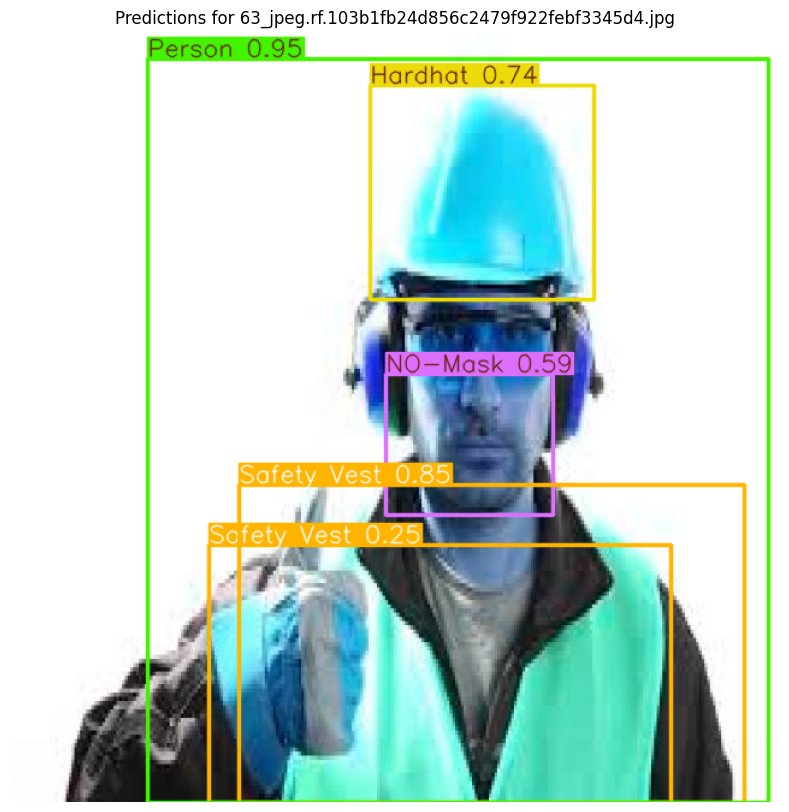

Displaying top 2 image: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/00000383_jpg.rf.16c89986842c3fefaf10b04aa1a8d0a1.jpg with max confidence: 0.94

image 1/1 /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/00000383_jpg.rf.16c89986842c3fefaf10b04aa1a8d0a1.jpg: 640x640 2 Hardhats, 2 Persons, 2 Safety Boots, 2 Safety Vests, 237.4ms
Speed: 3.1ms preprocess, 237.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


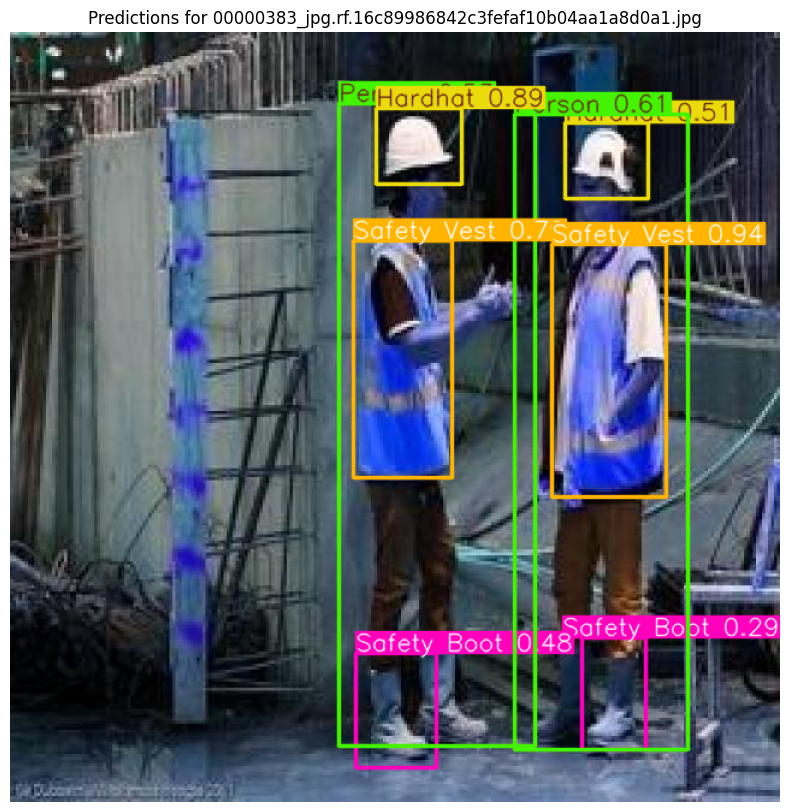

Displaying top 3 image: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/image_158_jpg.rf.0e75136eaa371d12a03aa70de161dbb0.jpg with max confidence: 0.93

image 1/1 /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/image_158_jpg.rf.0e75136eaa371d12a03aa70de161dbb0.jpg: 640x640 1 Hardhat, 1 Mask, 1 Person, 2 Safety Boots, 334.6ms
Speed: 6.4ms preprocess, 334.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


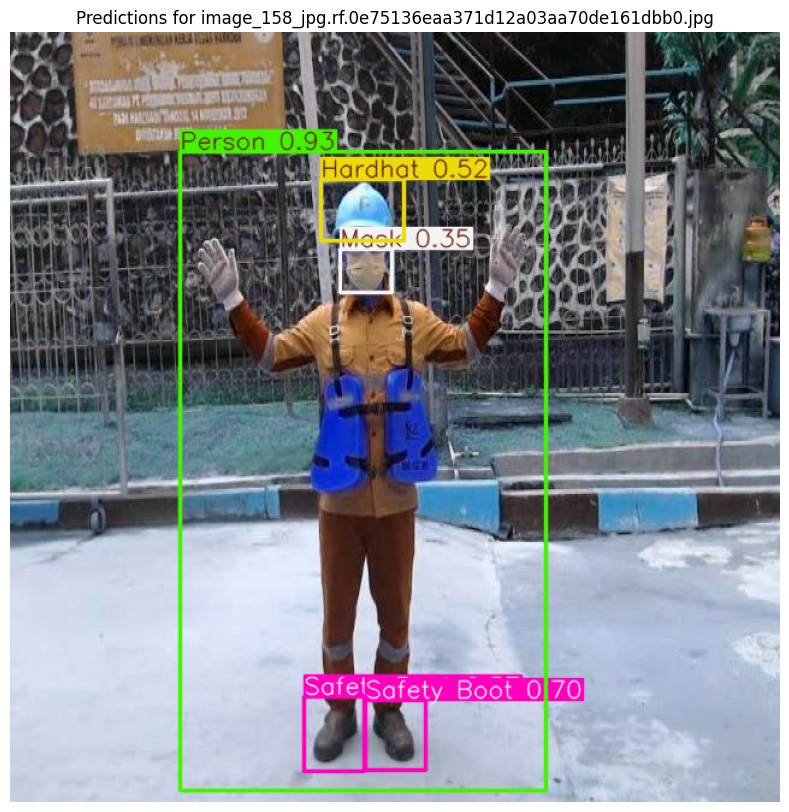

Displaying top 4 image: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/005310_jpg.rf.3e5ad1da03a32a4455c535e51b33953a.jpg with max confidence: 0.93

image 1/1 /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/005310_jpg.rf.3e5ad1da03a32a4455c535e51b33953a.jpg: 640x640 1 Hardhat, 1 Person, 1 Safety Vest, 356.2ms
Speed: 4.2ms preprocess, 356.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


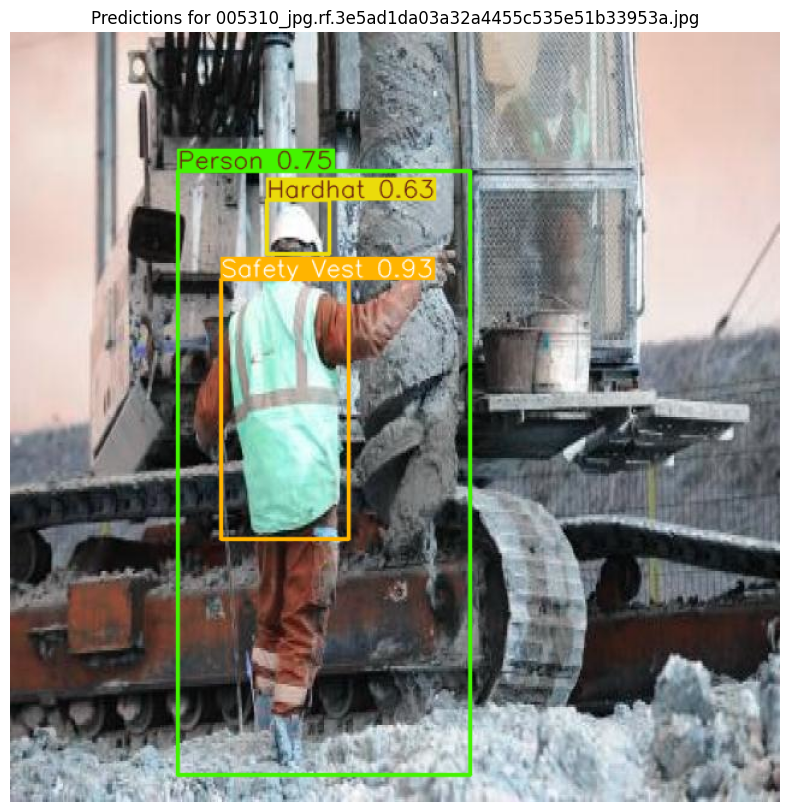

Displaying top 5 image: /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/94_jpeg.rf.5bdad0af4e091ef563937f526b0b9920.jpg with max confidence: 0.92

image 1/1 /content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images/94_jpeg.rf.5bdad0af4e091ef563937f526b0b9920.jpg: 640x640 1 Hardhat, 1 NO-Mask, 1 NO-Safety Vest, 1 Person, 2 Safety Boots, 328.0ms
Speed: 5.7ms preprocess, 328.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


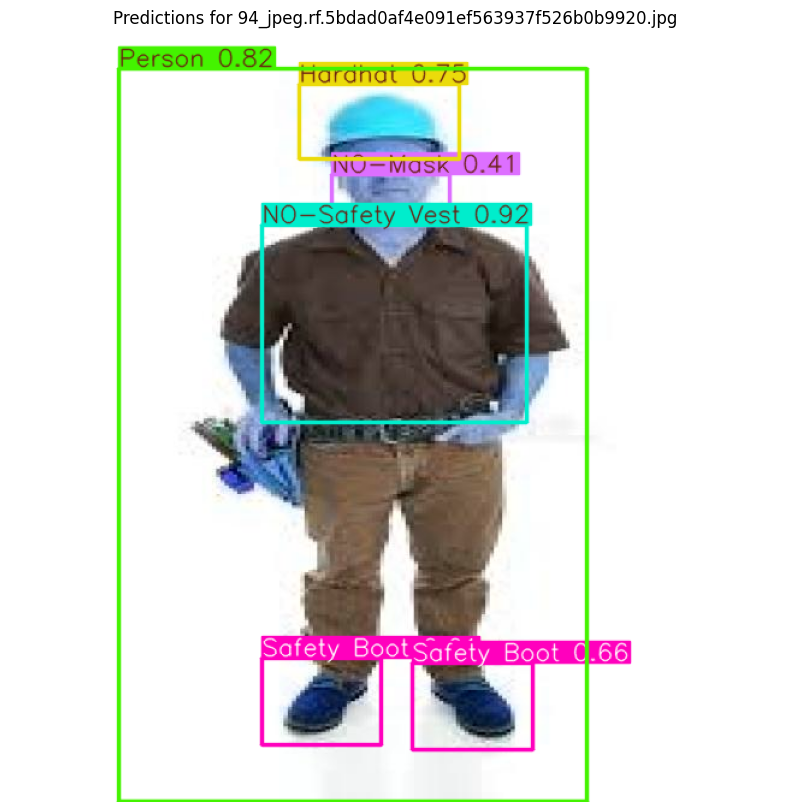

In [22]:
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
import logging
from pathlib import Path

def get_latest_finetune_dir(base_dir):
    """
    Finds the latest fine-tuning directory containing 'best.pt'.

    Args:
        base_dir (str): The base directory of the project.

    Returns:
        str or None: The path to the latest fine-tuning directory or None if not found.
    """
    runs_dir = os.path.join(base_dir, 'runs', 'train')
    latest_dir = None
    latest_timestamp = 0

    for dir_name in os.listdir(runs_dir):
        dir_path = os.path.join(runs_dir, dir_name)
        if dir_name.startswith('construction-safety-gear') and os.path.exists(
                os.path.join(dir_path, 'weights', 'best.pt')):  # Ensure 'best.pt' exists
            timestamp = os.path.getmtime(dir_path)
            if timestamp > latest_timestamp:
                latest_timestamp = timestamp
                latest_dir = dir_path

    return latest_dir


# Setup logging configuration
log_file = Path("/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/train_logs.log")
logging.basicConfig(
    filename=log_file,
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger()

# Define your base directory
base_dir = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project'

# Load the trained YOLOv8 model
latest_finetune_dir = get_latest_finetune_dir(base_dir)
if latest_finetune_dir:
    model_path = os.path.join(latest_finetune_dir, 'weights', 'best.pt')
else:
    raise FileNotFoundError("Could not find a suitable fine-tuning directory with best.pt.")

model = YOLO(model_path)

# Path to the test images or videos
test_data_path = '/content/drive/My Drive/Colab Notebooks/dataset/yolo_project/dataset/test/images'

# Get the list of test images (only images with supported extensions)
test_images = [os.path.join(test_data_path, img) for img in os.listdir(test_data_path) if img.lower().endswith(('jpg', 'jpeg', 'png'))]

# Print number of images found and check the list
print(f"Test images found: {len(test_images)}")

# Ensure the model is loaded correctly
print(f"Model loaded from: {model_path}")

# List to store the images with best detections (sorted by max confidence)
image_confidences = []

# Iterate through each image in the test directory and track the index
total_images = len(test_images)
for idx, img_path in enumerate(test_images, 1):  # Start index at 1
    try:
        print(f"Processing image {idx}/{total_images}: {img_path}")

        # Perform prediction for each image
        results = model(img_path)  # Run inference on each image

        # Initialize variable to track max confidence for each image
        max_confidence = 0

        # Process results for each image
        for r in results:
            if r.boxes.data is None:  # If no bounding boxes were detected
                continue

            # Iterate through bounding boxes and find max confidence
            for *xyxy, conf, cls in r.boxes.data:
                max_confidence = max(max_confidence, conf)

        # If the image has detections, store it along with its max confidence
        if max_confidence > 0:
            image_confidences.append((img_path, max_confidence))

    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        logger.error(f"Error processing {img_path}: {e}")

# Sort the images based on max confidence in descending order
sorted_images = sorted(image_confidences, key=lambda x: x[1], reverse=True)

# Get the top 5 images with the best detections
top_5_images = sorted_images[:5]

# Display the top 5 images with bounding boxes
for idx, (img_path, confidence) in enumerate(top_5_images, 1):
    try:
        print(f"Displaying top {idx} image: {img_path} with max confidence: {confidence:.2f}")

        # Perform prediction for each of the top 5 images
        results = model(img_path)  # Run inference on each image

        if not results:  # If no results are returned for the image
            continue

        # Process results for each image
        for r in results:
            if r.boxes.data is None:  # If no bounding boxes were detected
                continue

            # Display the image with bounding boxes
            plt.figure(figsize=(15, 10))  # Increased figure size for better readability
            plt.imshow(r.plot())  # plot() returns an image with bounding boxes drawn on it
            plt.title(f"Predictions for {Path(img_path).name}")
            plt.axis('off')
            plt.show()

    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        logger.error(f"Error processing {img_path}: {e}")
